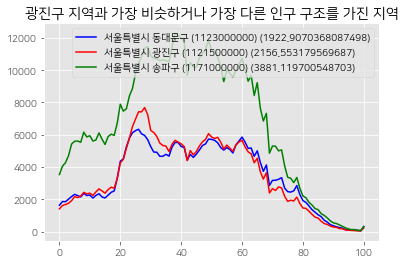

In [1]:
#week14 - 실습 1 : 우리 동네 인구 구조 시각화

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

def strToInt(s):
    res = str(s)
    res = res.replace(',', '')
    return int(res)



f = open('week14_human.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)

all = []
a = []
b = []

li = []

main_idx = 4

# 전체 데이터 만들기
for low in data:
    all.append(low)
    if low[0] != '서울특별시  (1100000000)':
        temp = []
        for i in range(3, len(low)):
            if i > 0:
                n = strToInt(low[i])
                temp.append(n)

        a.append(temp)

# 차 연산을 위한 배열 만들기
li = a[main_idx]
for i in range(len(a)):
    b.append(li)

a = np.array(a)
b = np.array(b)

# 차의 곱
e = (a - b) ** 2
f = e.sum(axis=1)

maxi = 0
mini = 999999999999999999999999999999

min_idx = -1
max_idx = -1

for i in range(len(f)):
    if maxi < f[i]:
        maxi = f[i]
        max_idx = i
    if mini > f[i] and f[i] != 0:
        mini = f[i]
        min_idx = i
    
    

main_li = a[main_idx]
min_li = a[min_idx]
max_li = a[max_idx]

main_std = np.std(main_li)
min_std = np.std(min_li)
max_std = np.std(max_li)

font_name = fm.FontProperties(fname='nanum_square_bold.ttf').get_name()

plt.style.use('ggplot')
plt.rc('font', family=font_name)
plt.title('광진구 지역과 가장 비슷하거나 가장 다른 인구 구조를 가진 지역')

main_leg_txt = all[main_idx + 1][0] + ' (' + str(main_std) + ')'
max_leg_txt = all[max_idx + 1][0] + ' (' + str(max_std) + ')'
min_leg_txt = all[min_idx + 1][0] + ' (' + str(min_std) + ')'

plt.plot(min_li, 'b-', label=str(min_leg_txt))
plt.legend()

plt.plot(main_li, 'r-', label=main_leg_txt)
plt.legend()

plt.plot(max_li, 'g-', label=max_leg_txt)
plt.legend()
plt.show()